# Text Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [2]:
sa=pd.read_csv("preprocessed.csv",)
sa.drop(['Unnamed: 0'],axis='columns', inplace=True)
sa=sa[0:100000]

In [3]:
sa.shape
#sa['text']=sa['text'].astype("str")

(100000, 11)

In [4]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   created_at       100000 non-null  object
 1   hashtags         14361 non-null   object
 2   id               100000 non-null  int64 
 3   lang             100000 non-null  object
 4   retweet_count    100000 non-null  int64 
 5   source           99829 non-null   object
 6   text             100000 non-null  object
 7   user_created_at  100000 non-null  object
 8   user_id          100000 non-null  int64 
 9   user_location    59241 non-null   object
 10  user_verified    100000 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 7.7+ MB


In [5]:
sa.head()

,created_at,hashtags,id,lang,retweet_count,source,text,user_created_at,user_id,user_location,user_verified
0,2022-02-28 07:22:45,NaN,1498196962780213248,en,0,Android,@newsbusters It's because Trump is the head of...,2009-04-25 22:04:49,35323079,USA,False
1,2022-02-28 07:22:45,NaN,1498196962914750464,en,4642,iPhone,Ukraine Russia conflict highlights that geogra...,2010-09-01 06:57:29,185542202,India,False
2,2022-02-28 07:22:45,NaN,1498196963174453248,en,0,WebApp,@Puno_de_hierro so to kill handful of people i...,2011-08-19 14:19:06,358179214,CA,False
3,2022-02-28 07:22:45,NaN,1498196959735463936,en,376,Android,"Union ministers Hardeep Puri,Jyotiraditya Scin...",2019-09-07 08:35:58,1170254281708097536,India,False
4,2022-02-28 07:22:45,NaN,1498196963006820352,en,321,Android,BREAKING: President Putin orders nuclear deter...,2016-03-10 14:29:23,707936393012584448,PA,False


In [6]:
plt.style.use("fivethirtyeight")

In [7]:
def cleantweet(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    return text
sa['text']=sa["text"].apply(cleantweet)

In [8]:
def text_converter(text):
    return text.lower()
sa['text']=sa['text'].apply(text_converter)

In [9]:
def GetSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def GetPolarity(text):
    return TextBlob(text).sentiment.polarity
sa['Subjectivity']=sa["text"].apply(GetSubjectivity)
sa['Polarity']=sa["text"].apply(GetPolarity)

In [24]:
sa.sample(4)

,created_at,hashtags,id,lang,retweet_count,source,text,user_created_at,user_id,user_location,user_verified,Subjectivity,Polarity,Sentiment
63721,2022-03-09 04:32:02,NaN,1501415489456820224,en,40,iPad,"cyber war is on, whether you realize it or not...",2012-09-28 17:24:20,851442715,NaN,False,0.275000,0.012500,Positive
70559,2022-03-06 11:07:03,NaN,1500427737550540800,en,1,Android,ukraine is the only country in the world t...,2021-10-21 12:10:08,1451158822832250880,NaN,False,1.000000,0.000000,Neutral
3149,2022-03-04 20:44:59,NaN,1499848403030667264,en,6935,Android,moscow update: \n\n— facebook/twitter blocked ...,2020-12-04 04:59:38,1334723920843341824,NaN,False,0.211458,-0.028125,Negative
73703,2022-03-05 18:41:46,NaN,1500179782167838720,en,0,Android,4 years of trump kissing russian and saudi b...,2009-08-13 17:12:20,65412577,NaN,False,0.362963,0.233333,Positive


In [11]:
# #stopwords.words('english')
# import nltk
# from nltk.corpus import stopwords
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# #nltk.download("stopwords")   (if not available download)

# def remove_stopwords(text):
#     x=[]
#     for i in text.split():
#         if i not in stopwords.words('english'):
#             x.append(i)
#     y=x[:]
#     x.clear()
#     return y
# sa['text']=sa['text'].apply(remove_stopwords)

In [12]:
# #perform stemming
# from nltk.stem.porter import PorterStemmer
# ps=PorterStemmer()
# y=[]
# def stem_words(text):
#     for i in text:
#         y.append(ps.stem(i))
#     z=y[:]
#     y.clear()
#     return z
# #stem_words(['i',"hating","hated","it"])   # ['i', 'hate', 'hate', 'it']
# sa['text']=sa['text'].apply(stem_words)

In [13]:
# # join back
# def join_back(list_input):
#     return " ".join(list_input)
# sa['text']=sa['text'].apply(join_back)

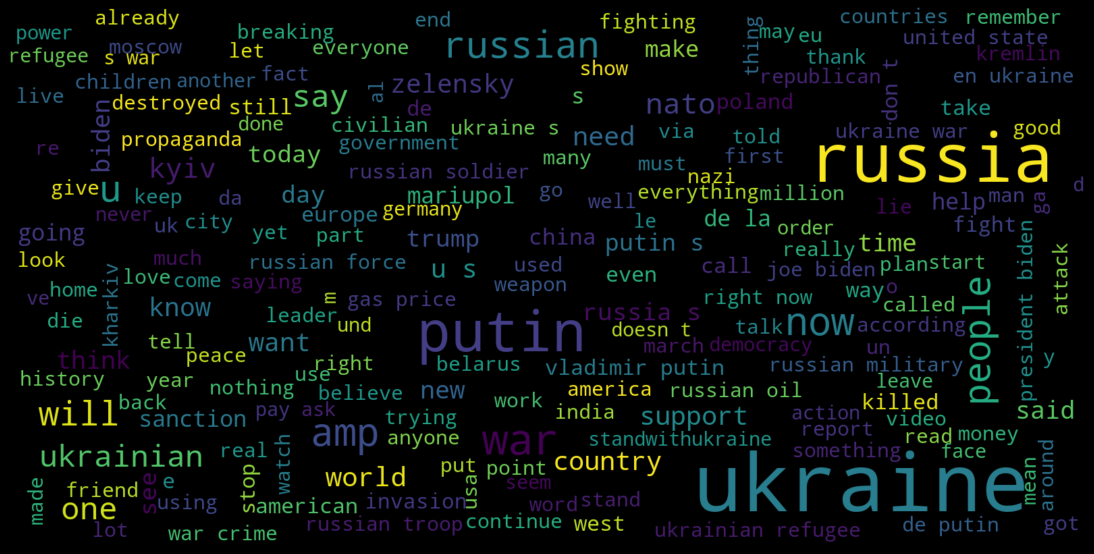

<Figure size 432x288 with 0 Axes>

In [35]:
# wordcloud
joinword=" ".join(tweet for tweet in sa["text"])
plt.figure( figsize=(15,8), facecolor='k')
wordcloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=119).generate(joinword)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('wordcloud.png')

In [25]:
sa.sample(4)

,created_at,hashtags,id,lang,retweet_count,source,text,user_created_at,user_id,user_location,user_verified,Subjectivity,Polarity,Sentiment
41537,2022-03-18 13:17:05,NaN,1504809115247280128,en,2678,iΟS,good morning and happy friday to everyone exce...,2008-05-05 03:49:20,14655437,WA,False,0.465000,0.280000,Positive
39215,2022-03-19 16:47:01,NaN,1505224334956236800,en,23,iPhone,there is much talk of war crimes at the moment...,2012-04-22 22:17:21,560635712,Oxford,False,0.578571,-0.129762,Negative
38228,2022-03-19 05:48:26,NaN,1505058595704119296,en,481,Android,what is happening in ukraine is a daily life i...,2019-06-06 13:58:44,1136633525204127744,NaN,False,0.000000,0.000000,Neutral
96275,2022-03-09 04:33:19,NaN,1501415811675828224,en,514,Android,russian military interventions are often expla...,2016-12-24 20:41:18,812760079116206080,AL,False,0.312500,0.250000,Positive


In [16]:
def catchsentiment(polarity):
    if polarity<0:
        return 'Negative'
    elif polarity==0:
        return 'Neutral'
    else:
        return 'Positive'
sa['Sentiment']=sa["Polarity"].apply(catchsentiment)

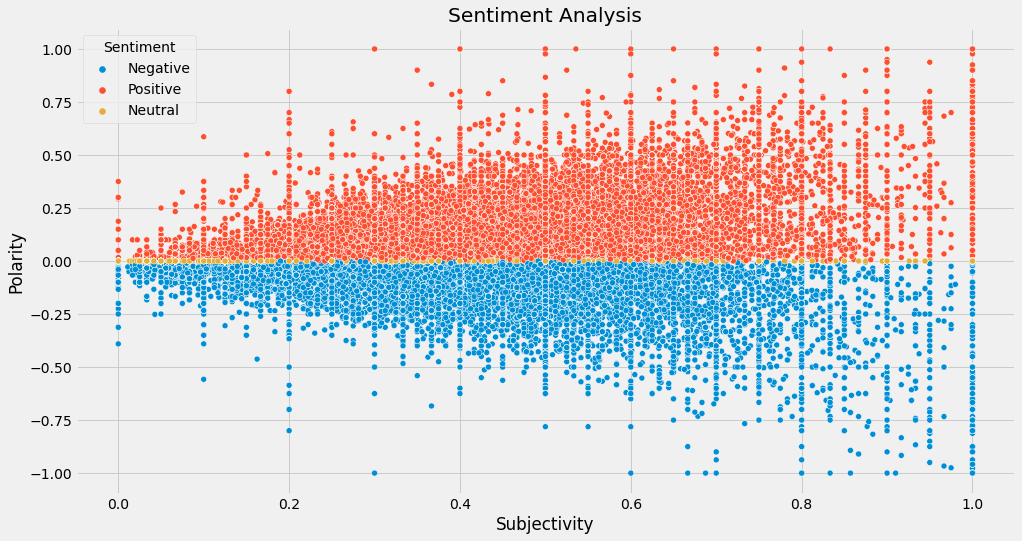

In [36]:
#plot polarity and subjectivity
plt.style.use("fivethirtyeight")
plt.figure( figsize=(15,8))
import seaborn as sns
sns.scatterplot(x='Subjectivity', y="Polarity", data=sa, hue='Sentiment',color=['red'])
plt.title("Sentiment Analysis")
plt.xlabel("Subjectivity")
plt.ylabel("Polarity")

plt.savefig('sentiment_analysis.png')

In [29]:
# percentage of Positive tweets
postweets=sa[sa.Sentiment=="Positive"]
postweets=postweets["text"]
print(f"{round((postweets.shape[0]/sa.shape[0])*100,1)}% \n")
print(postweets.iloc[12])

33.5% 

photoprintday ukraine there is also no limit to the number of prints you can donate, 1 or a million. just so long as all individual prints are made available for a proof of donation for £€$10 to charity or org so as many people can afford to participate &amp; help.


In [19]:
# percentage of Neutral tweets
neutraltweets=sa[sa.Sentiment=="Neutral"]
neutralweets=neutraltweets["text"]
print(f"{round((neutralweets.shape[0]/sa.shape[0])*100,1)}% \n")
print(neutralweets.iloc[9])

45.4% 

rosja rozpoczyna nadawać propagandę mówiąc obywatelom, że zachód ich nienawidzi, oraz sankcje które zaraz doświadczą dostają tylko za to kim są, za nazwiska.

putin usprawiedliwia inwazję na ukraina próbując kupić poparcie zdezinformowanego społeczeństwa.

russia ukraine 


In [34]:
# percentage of Negative tweets
negtweets=sa[sa.Sentiment=="Negative"]
negtweets=negtweets["text"]
print(f"{round((negtweets.shape[0]/sa.shape[0])*100,1)}% \n")
print(negtweets.iloc[32])

21.1% 

way back in 2011, around 18k indian’s were evacuated during the violent protests in libya without any fuss.. i never heard dr manmohan singh using such a humanitarian rescue for votes..ukrainian rescue will definitely be used for boasting and votes… 


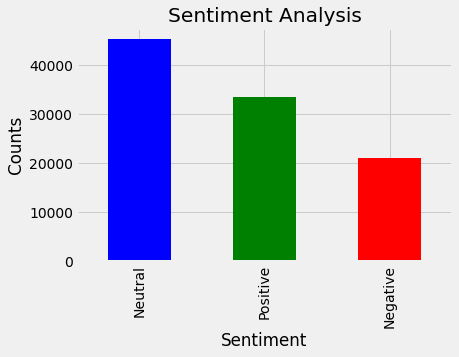

In [37]:
# Show the value counts
sa['Sentiment'].value_counts()
# plot and visualize counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
sa['Sentiment'].value_counts().plot(kind='bar',color=['Blue','green','red'])

plt.savefig('sentiment_count.png')